# DATA SCIENCE WITH PYTHON  REPORT COVID-19 

We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Thank you @CSSEGISandData for providing the data!

# Data Visualization COVID-19

In [1]:
from IPython.display import IFrame
IFrame('https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6', height=700, width=960)

# Data Analaysis COVID-19 Report i Data Science with Python

In [2]:
%config InlineBackend.figure_formats = ['svg']
import math
from numpy import log, exp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (11, 4)   # need bigger size otherwise xlabels are cut-off in svg files

import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')
import scipy
import numpy as np
import iminuit

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    # return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')
    return pd.to_datetime(input_, format='%m/%d/%y')

def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#

def fetch_data(names = ['confirmed', 'deaths']):
    """Return 3 data frames:
    [confirmed, deaths], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_covid19_" + name + "_global.csv")
        df = pd.read_csv(url, index_col=1)
    
        if not name == 'Recovered':
            location_info['Lat'] = df['Lat']
            location_info['Long'] = df['Long']
            location_info['Province/State'] = df['Province/State']
            location_info['location'] = df.index + "-" + df['Province/State']
        else:
            pass  # no location info in recovered since 14 March
        ## df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns[1:])        
        # use those objects as new column labels
        df.columns = [df.columns[0]] + list(dates)
        print(f"{name:10}: last data point from {max(dates[1:])}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs


confirmed, deaths = fetch_data()

# show counries with mosth deaths
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[0:10,-8:]

confirmed : last data point from 2020-05-14 00:00:00
deaths    : last data point from 2020-05-14 00:00:00


2020-05-07 00:00:00  2020-05-08 00:00:00  2020-05-09 00:00:00  \
Country/Region                                                                  
US                            75662                77180                78795   
United Kingdom                30615                31241                31587   
Italy                         29958                30201                30395   
France                        25949                26192                26271   
Spain                         26070                26299                26478   
Brazil                         9190                10017                10656   
Belgium                        8415                 8521                 8581   
Germany                        7392                 7510                 7549   
Iran                           6486                 6541                 6589   
Netherlands                    5288                 5359                 5422   

                2020-05-10 00:00:00  2020-05-11 00:00:00  2020-05-12 00:00:00  \
Country/Region                                                                  
US                            79526                80682                82356   
United Kingdom                31855                32065                32692   
Italy                         30560                30739                30911   
France                        26341                26604                26951   
Spain                         26621                26744                26920   
Brazil                        11123                11653                12461   
Belgium                        8656                 8707                 8761   
Germany                        7569                 7661                 7738   
Iran                           6640                 6685                 6733   
Netherlands                    5440                 5456                 5510   

                2020-05-13 00:00:00  2020-05-14 00:00:00  
Country/Region                                            
US                            84119                85898  
United Kingdom                33186                33614  
Italy                         31106                31368  
France                        27032                27381  
Spain                         27104                27321  
Brazil                        13240                13999  
Belgium                        8843                 8903  
Germany                        7861                 7884  
Iran                           6783                 6854  
Netherlands                    5562                 5590

In [3]:
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[:,-8:]


2020-05-07 00:00:00  2020-05-08 00:00:00  2020-05-09 00:00:00  \
Country/Region                                                                  
US                            75662                77180                78795   
United Kingdom                30615                31241                31587   
Italy                         29958                30201                30395   
France                        25949                26192                26271   
Spain                         26070                26299                26478   
...                             ...                  ...                  ...   
Mozambique                        0                    0                    0   
Timor-Leste                       0                    0                    0   
Bhutan                            0                    0                    0   
Laos                              0                    0                    0   
Lesotho                           0                    0                    0   

                2020-05-10 00:00:00  2020-05-11 00:00:00  2020-05-12 00:00:00  \
Country/Region                                                                  
US                            79526                80682                82356   
United Kingdom                31855                32065                32692   
Italy                         30560                30739                30911   
France                        26341                26604                26951   
Spain                         26621                26744                26920   
...                             ...                  ...                  ...   
Mozambique                        0                    0                    0   
Timor-Leste                       0                    0                    0   
Bhutan                            0                    0                    0   
Laos                              0                    0                    0   
Lesotho                           0                    0                    0   

                2020-05-13 00:00:00  2020-05-14 00:00:00  
Country/Region                                            
US                            84119                85898  
United Kingdom                33186                33614  
Italy                         31106                31368  
France                        27032                27381  
Spain                         27104                27321  
...                             ...                  ...  
Mozambique                        0                    0  
Timor-Leste                       0                    0  
Bhutan                            0                    0  
Laos                              0                    0  
Lesotho                           0                    0  

[266 rows x 8 columns]

In [4]:
def double_time_exponential(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate(double_time):
    return log(2)/double_time

def double_time(growth_rate):
    return log(2)/growth_rate


# t1, t2, q1, q2 = 0, 1, 1, 2
# double_time_exponential(t1, t2, q1, q2), growth_rate(double_time_exponential(t1, t2, q1, q2) )

def double_time_exponential(q2_div_q1, t2_minus_t1=None):
    # print(f"double_time_exponential: {q2_div_q1}, {t2_minus_t1} ")
    if t2_minus_t1 is None:
        t2_minus_t1 = np.ones(q2_div_q1.shape)
        # print(f"shape t: {t2_minus_t1.shape}, shape q: {q2_div_q1.shape}")
        # print(f"type t: {type(t2_minus_t1)}, type q: {type(q2_div_q1.shape)}")

    return t2_minus_t1 * np.log(2) / np.log(q2_div_q1) 


def stack_country(country = "Germany"):

    #create one DataFrame for country/region
    c_df = pd.DataFrame()
    if country == "United Kingdom":
        # UK has many provinces that keep changing. Sum to get all (most relevant is mainland UK)
        c_df['confirmed'] = confirmed.loc[country].sum()
        c_df['deaths'] = deaths.loc[country].sum()
    elif country == "China": 
        # Use only Hubei province
        tmp = confirmed.loc[country]
        c_df['confirmed'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        tmp = deaths.loc[country]
        c_df['deaths'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        c_df.drop("Province/State", inplace=True)
    elif country in ['France']:
        c_df['confirmed'] = confirmed.loc[country].sum()
        c_df['deaths'] = deaths.loc[country].sum()
        c_df.drop('Province/State', inplace=True)
    elif country in ['US']:
        c_df['confirmed'] = confirmed.loc[country]
        c_df['deaths'] = deaths.loc[country]
    else:
        c_df['confirmed'] = confirmed.loc[country].drop('Province/State')
        c_df['deaths'] = deaths.loc[country].drop('Province/State')

    # drop days with confirmed cases = 0
    c1 = c_df[c_df['confirmed'] != 0][1:]
    
    # drop another row
    c_df = c1
  
    c_df.index = string_to_date(c_df.index)
    c_df.country = country  # remember which country we work on, just in case
    
    c_df['days-td'] = c_df.index - c_df.index.min()  # days as TimeDelta type
    c_df['days'] = c_df['days-td'].astype("timedelta64[D]").astype(float)
    
    c_df['new_confirmed'] = c_df['confirmed'].diff()
    c_df['new_deaths'] = c_df['deaths'].diff()
    
    c_df['confirmed_pct'] = c_df['confirmed'].pct_change()+1
    c_df['deaths_pct'] = c_df['deaths'].pct_change()+1
    
    #return c_df
    # growth rate
    c_df['deaths_double_time'] = double_time_exponential(c_df['deaths_pct'].values)
    c_df['confirmed_double_time'] = double_time_exponential(c_df['confirmed_pct'].values)
    c_df['deaths_growth_rate'] = growth_rate(c_df['deaths_double_time'].values)
    c_df['confirmed_growth_rate'] = growth_rate(c_df['confirmed_double_time'].values)

    return c_df

In [5]:
import warnings
warnings.filterwarnings('ignore')
c = stack_country("Germany")
#c.tail(n=5)
c2 = stack_country("United Kingdom")
#c.tail(n=5)
#c2 = stack_country("Spain")
#c.tail(n=5)
c2 = stack_country("Italy")
#c2.tail(n=5)
#c2 = stack_country("France")
#c2.tail(n=5)
c2 = stack_country("China")
#c2.tail(n=5)
#c2 = stack_country("US")

c

confirmed deaths  days-td   days new_confirmed new_deaths  \
2020-01-28         4      0   0 days    0.0           NaN        NaN   
2020-01-29         4      0   1 days    1.0             0          0   
2020-01-30         4      0   2 days    2.0             0          0   
2020-01-31         5      0   3 days    3.0             1          0   
2020-02-01         8      0   4 days    4.0             3          0   
...              ...    ...      ...    ...           ...        ...   
2020-05-10    171879   7569 103 days  103.0           555         20   
2020-05-11    172576   7661 104 days  104.0           697         92   
2020-05-12    173171   7738 105 days  105.0           595         77   
2020-05-13    174098   7861 106 days  106.0           927        123   
2020-05-14    174478   7884 107 days  107.0           380         23   

            confirmed_pct  deaths_pct  deaths_double_time  \
2020-01-28            NaN         NaN                 NaN   
2020-01-29       1.000000         NaN                 NaN   
2020-01-30       1.000000         NaN                 NaN   
2020-01-31       1.250000         NaN                 NaN   
2020-02-01       1.600000         NaN                 NaN   
...                   ...         ...                 ...   
2020-05-10       1.003239    1.002649          261.974824   
2020-05-11       1.004055    1.012155           57.372300   
2020-05-12       1.003448    1.010051           69.309639   
2020-05-13       1.005353    1.015896           43.951946   
2020-05-14       1.002183    1.002926          237.252056   

            confirmed_double_time  deaths_growth_rate  confirmed_growth_rate  
2020-01-28                    NaN                 NaN                    NaN  
2020-01-29                    inf                 NaN               0.000000  
2020-01-30                    inf                 NaN               0.000000  
2020-01-31               3.106284                 NaN               0.223144  
2020-02-01               1.474770                 NaN               0.470004  
...                           ...                 ...                    ...  
2020-05-10             214.315301            0.002646               0.003234  
2020-05-11             171.275241            0.012082               0.004047  
2020-05-12             201.389346            0.010001               0.003442  
2020-05-13             129.831692            0.015771               0.005339  
2020-05-14             317.913652            0.002922               0.002180  

[108 rows x 12 columns]

In [6]:
confirmed.loc["US"]

Province/State             NaN
2020-01-22 00:00:00          1
2020-01-23 00:00:00          1
2020-01-24 00:00:00          2
2020-01-25 00:00:00          2
                        ...   
2020-05-10 00:00:00    1329260
2020-05-11 00:00:00    1347881
2020-05-12 00:00:00    1369376
2020-05-13 00:00:00    1390406
2020-05-14 00:00:00    1417774
Name: US, Length: 115, dtype: object

In [7]:
def overview_plot(c_df, rollingwindow=7):
    """expect """
    fig, axes = plt.subplots(4, 1, figsize=(8, 14))
    ax = axes[0]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['confirmed'], '-b', label='confirmed')
    ax.plot(c_df.index, c_df['deaths'], '-r', label='deaths')
    ax.legend(loc='center left')
    country = c_df.country
    ax.set_title(country + " accumulated data")
    ax.set_yscale('log')

    ax = axes[1]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['confirmed'].diff(), 'ob', label='day-to-day change confirmed')
    ax.plot(c_df.index, c_df['deaths'].diff(), 'xr', label='day-to-day change deaths')
    ax.legend(loc='center left')
    #ax.set_yscale('log')
    

    ax = axes[2]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_double_time'], 'xr', label='double time deaths')
    ax.plot(c_df.index, c_df['deaths_double_time'].rolling(rollingwindow, center=True).mean(),
            '-r', label='double time deaths rolling')
    ax.plot(c_df.index, c_df['confirmed_double_time'], 'ob', label='double time confirmed')
    ax.plot(c_df.index, c_df['confirmed_double_time'].rolling(rollingwindow, center=True).mean(), 
            '-b', label='double time confirmed rolling')
    ax.legend(loc='center left')
    ax.set_ylabel('days to double numbers \n bigger is better')
    maxy = min(20, max(c_df['confirmed_double_time']))
    ax.set_ylim(0, maxy)

    ax = axes[3]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_growth_rate'], 'xr', label='growth rate deaths')
    ax.plot(c_df.index, c_df['deaths_growth_rate'].rolling(rollingwindow, center=True).mean(), 'r-', label='growth rate deaths rolling')
    ax.plot(c_df.index, c_df['confirmed_growth_rate'], 'ob', label='confirmed growth rate')
    ax.plot(c_df.index, c_df['confirmed_growth_rate'].rolling(rollingwindow, center=True).mean(), 
            'b-', label='confirmed growth rate rolling')
    ax.legend(loc='center left')
    ax.set_ylim(0, 0.5)
    ax.set_ylabel('growth rate r in\n f(t) = exp(r*t)\n(smaller is better)')
    
    # fig.savefig(f"figures/{country}-overview.svg")
    return axes

In [8]:
import warnings
warnings.filterwarnings('ignore')
china = stack_country('China')
germany = stack_country('Germany')
uk = stack_country("United Kingdom")
us = stack_country("US")
italy = stack_country("Italy")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1121e5f50>,
      dtype=object)

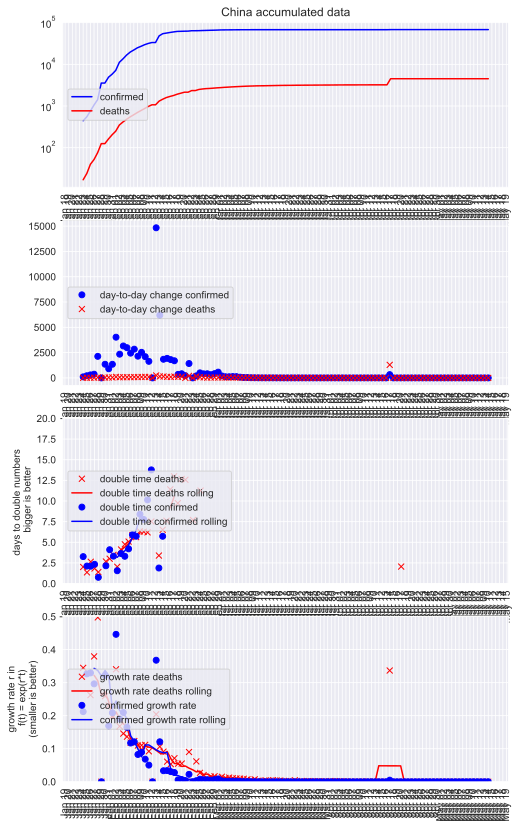

In [9]:
overview_plot(china)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12c2c0bd0>,
      dtype=object)

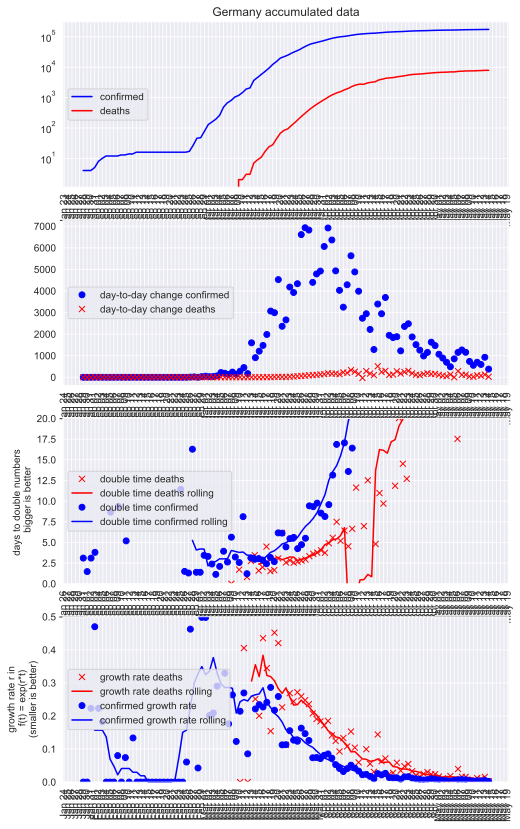

In [10]:
overview_plot(germany)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12d0c00d0>,
      dtype=object)

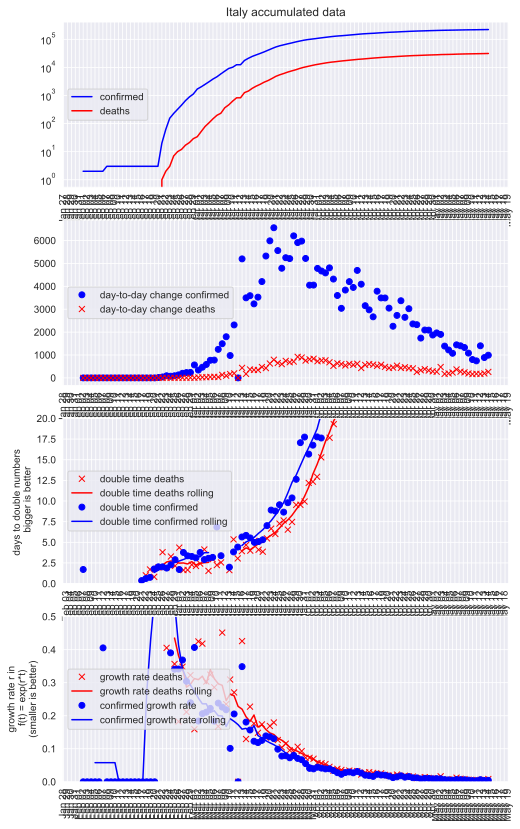

In [11]:
overview_plot(italy)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12da942d0>,
      dtype=object)

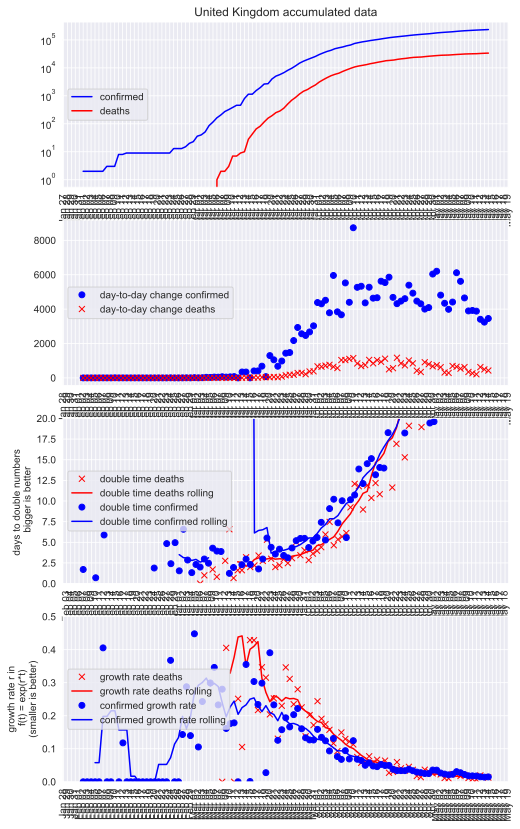

In [12]:
overview_plot(uk)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12e383710>,
      dtype=object)

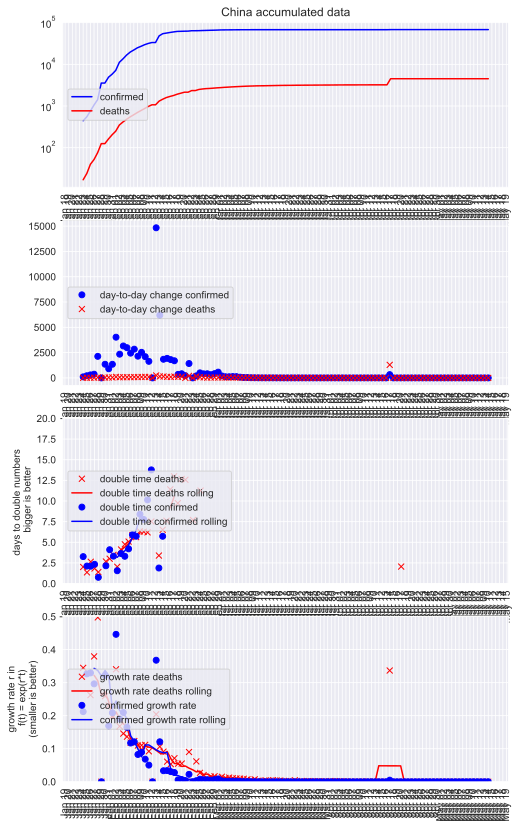

In [13]:
c = stack_country('China')
overview_plot(c)

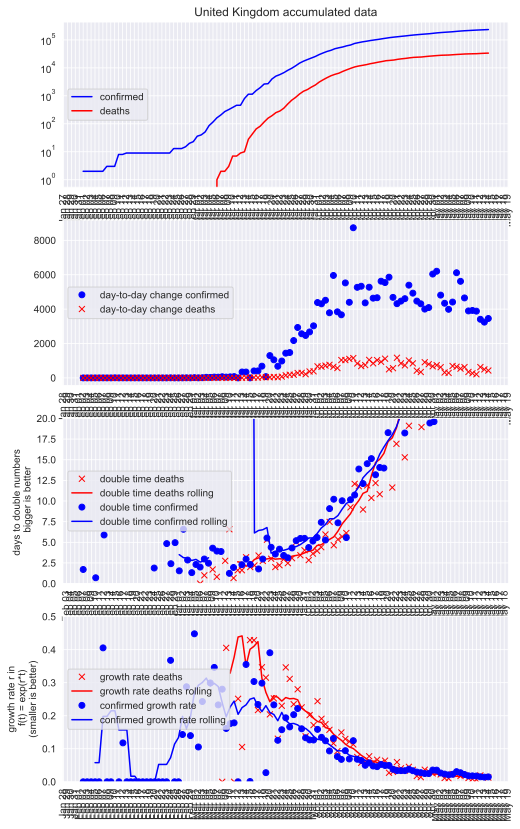

In [14]:
uk = stack_country('United Kingdom')
overview_plot(uk);

In [15]:
# compute doubling time (and growth rate) for a longer sequence of days (by fitting)


reduced chi^2: 0.008530621993483416
r   : 0.166
t0  : 12.6
a0  : 4.21



------------------------------------------------------------------
| FCN = 0.008531                |     Ncalls=174 (174 total)     |
| EDM = 8.54E-05 (Goal: 0.0002) |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | r    |   0.17    |   0.12    |            |            |         |         |       |
| 1 | t0   |    13     |    13     |            |            |         |         |       |
| 2 | a0   |    4.2    |    2.8    |            |            |         |         |       |
------------------------------------------------------------------------------------------

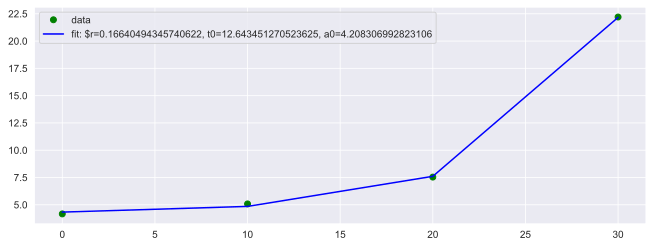

In [16]:
def pretty_params(**par):
    end='\n'
    s = ""
    for p in par:
        s += f"{p:3} : {par[p]:.3g}" + end
    return s


def model(xdata, r, t0, a0):
    return np.exp(r*(xdata-t0))+a0



def exp_fit(xdata, ydata, p0):
    r, t0, a0 = p0
    
    def least_squares(r, t0, a0):
        yvar = 10
        return sum((ydata - model(xdata, r, t0, a0))**2)/yvar
    
    m = iminuit.Minuit(least_squares, 
                       r=r, t0=t0, a0=a0, error_r=0.02, error_t0=0.2, error_a0=1, 
                       errordef=1)
    res = m.migrad()
    print(f"reduced chi^2: {m.fval / (len(ydata) - 3)}")
    r, t0, a0 = m.np_values()
    print(pretty_params(r=r, t0=t0, a0=a0))
    
    return m, res

def plot(xdata, ydata, r, t0, a0, annotate=""):
    #r, t0, a0 = m.np_values()

    fitted = model(xdata, r, t0, a0)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(xdata, ydata, 'og')
    ax.plot(xdata, fitted, '-b')
    ax.legend(["data", f"fit: $r={r}, t0={t0}, a0={a0}"])
    #ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')})")
    ax.set_title(annotate)
    #ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    #ax.tick_params(axis='x', rotation=90)
    #fig.savefig('figures/infections-with-model-fit.svg')
    # print(fitted_infections)
    return ax

def test_model(): 
    xdata = np.linspace(0, 30, 4)
    ydata = 0 + np.exp(0.1*(xdata - 0)) + 5*np.random.random_sample(xdata.shape)    
    m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
    r, t0, a0 = m.np_values()
    plot(xdata, ydata, r, t0, a0)
    return res, m, xdata, ydata


res, m, xdata, ydata = test_model()
res


reduced chi^2: 0.25553283873248533
r   : 0.0239
t0  : -44.6
a0  : 6.81e+04

Double time: 29.0 days


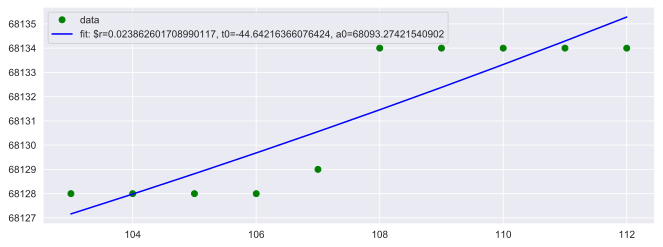

In [17]:
# Exponential fit through last n days
series = c['confirmed']
start = -10
end = None
xdata_0 = (series.index[start:end] - series.index[0])
xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
ydata = series.values[start:end]
# Attempt fit
m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
r, t0, a0 = m.np_values()
plot(xdata, ydata, r, t0, a0)
print(f"Double time: {double_time(r):.1f} days")


reduced chi^2: 1.206158383262541e-06
r   : 0.000947
t0  : 93.7
a0  : 4.51e+03

Double time: 731.7 days


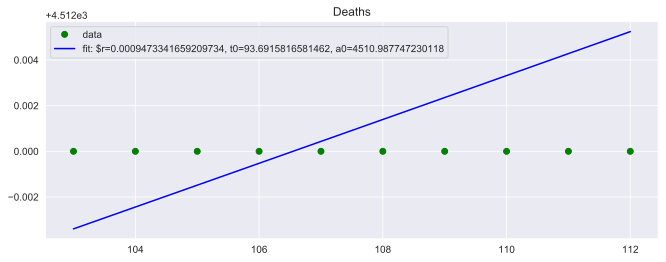

In [18]:
# Exponential fit through last n days, deaths
series = c['deaths']
start = -10
end = None
xdata_0 = (series.index[start:end] - series.index[0])
xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
ydata = series.values[start:end]
# Attempt fit
m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
r, t0, a0 = m.np_values()
ax = plot(xdata, ydata, r, t0, a0)
ax.set_title("Deaths")
print(f"Double time: {double_time(r):.1f} days")


In [19]:
def grow_rate_n_days(series, n=7):
    """Use the last 4 data points to estimate growth rate (and doubling time) for each day"""
    par = pd.DataFrame(index=series.index, columns=['r', 't0', 'a0', 'chi2'])
    print(f"Data stack shape = {series.shape}")
    for i in range(n, len(series)):
        start = i-n
        end = i
        print(f"Working on {start} to {end}, this is {start}/{len(series-n)}")
        xdata_0 = (series.index[start:end] - series.index[0])
        xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
        ydata = series.values[start:end]
        # Attempt fit
        m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
        r, t0, a0 = m.np_values()
        par.iloc[i].at['r'] = r
        par.iloc[i].at['t0'] = t0
        par.iloc[i].at['a0'] = a0
        print(f"r={r:10}, t0={t0:10}, a0={a0:10}")
        plot(xdata, ydata, r, t0, a0)
            
    return par

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 3613.4293916867346
r   : 0.0432
t0  : -235
a0  : 1.3e+05

r=0.04318029595091284, t0=-235.48672088923905, a0=130443.60164727057
Working on 1 to 8, this is 1/20
reduced chi^2: 8167.5439776389585
r   : 0.0159
t0  : -706
a0  : 8.2e+04

r=0.01588869711348787, t0=-706.0423389404604, a0=82039.4742918553
Working on 2 to 9, this is 2/20
reduced chi^2: 19466.28919970261
r   : 0.0116
t0  : -987
a0  : 6.01e+04

r=0.011625562385519999, t0=-987.3664656914256, a0=60111.98549913111
Working on 3 to 10, this is 3/20
reduced chi^2: 32172.803095589472
r   : 0.0103
t0  : -1.11e+03
a0  : 6.41e+04

r=0.01034728403883591, t0=-1106.1556165593822, a0=64106.32461948066
Working on 4 to 11, this is 4/20
reduced chi^2: 16201.380621150262
r   : 0.0106
t0  : -1.06e+03
a0  : 8.29e+04

r=0.010587684101901286, t0=-1061.3430479923459, a0=82871.55478461344
Working on 5 to 12, this is 5/20
reduced chi^2: 5029.862944962579
r   : 0.0176
t0  : -600
a0  : 

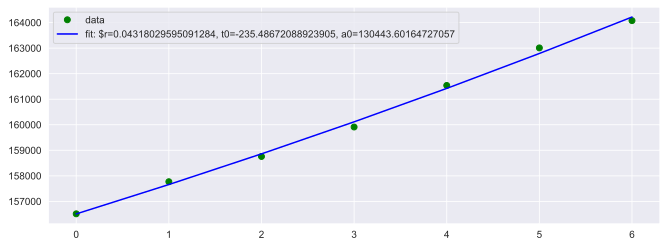

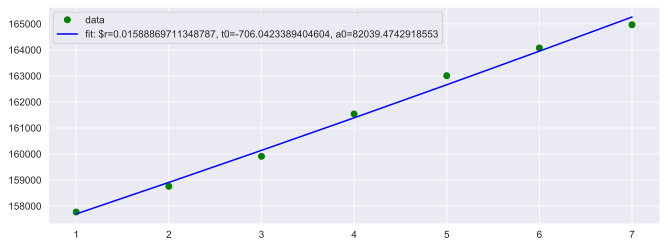

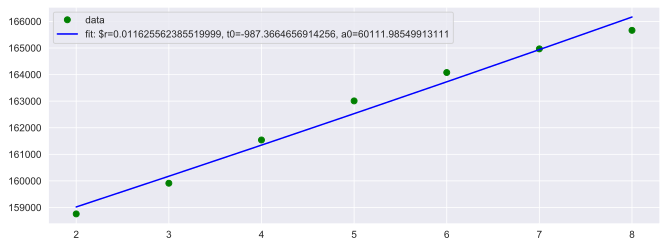

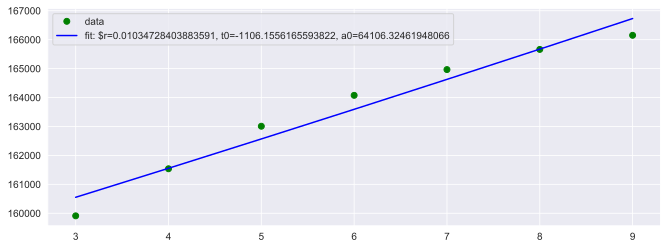

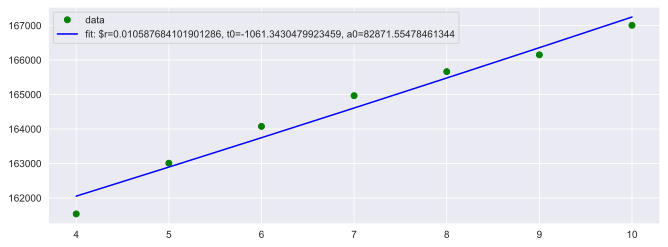

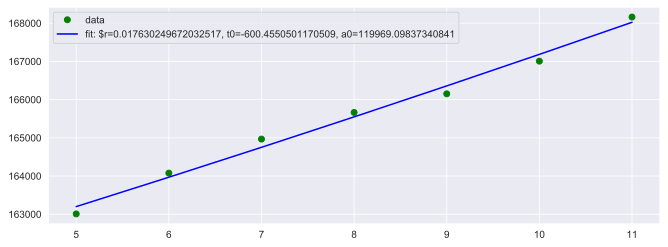

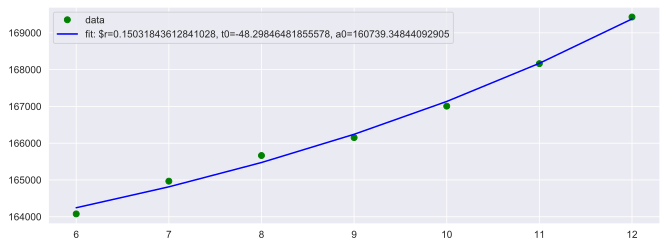

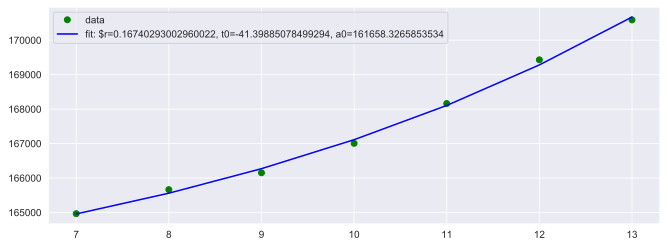

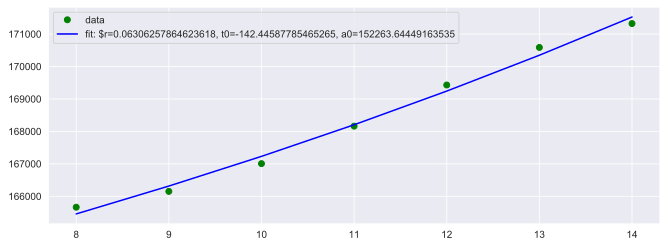

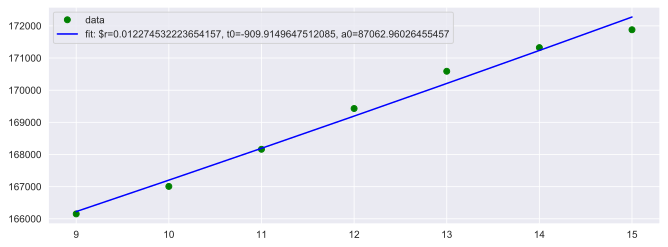

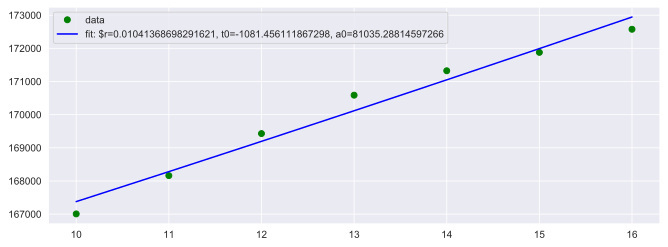

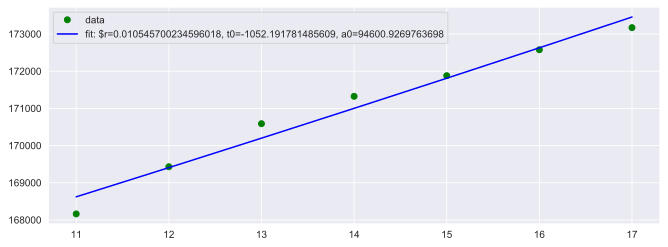

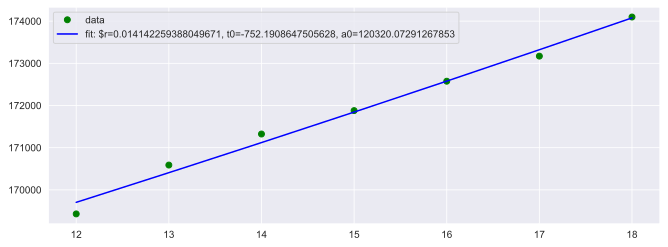

In [20]:
    
c = stack_country('Germany')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])
#

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 3391.3320000593258
r   : 0.0167
t0  : -697
a0  : 8.17e+04

r=0.01669384350984667, t0=-697.4200987355962, a0=81725.27478930689
Working on 1 to 8, this is 1/20
reduced chi^2: 1959.779124401257
r   : 0.0184
t0  : -625
a0  : 9.69e+04

r=0.018410276784017594, t0=-624.7741371372078, a0=96911.14509275989
Working on 2 to 9, this is 2/20
reduced chi^2: 9959.574028980589
r   : 0.0146
t0  : -801
a0  : 7.5e+04

r=0.014613008943909104, t0=-800.9877086119417, a0=74953.9604543832
Working on 3 to 10, this is 3/20
reduced chi^2: 20090.634202362577
r   : 0.013
t0  : -904
a0  : 7.13e+04

r=0.012988957062884447, t0=-903.8992181227349, a0=71329.63108670138
Working on 4 to 11, this is 4/20
reduced chi^2: 28328.395328676306
r   : 0.0119
t0  : -985
a0  : 7.54e+04

r=0.011896821522357826, t0=-984.9278823365195, a0=75383.98931776678
Working on 5 to 12, this is 5/20
reduced chi^2: 21763.849750197973
r   : 0.0122
t0  : -947
a0  : 9.16e+04

r=

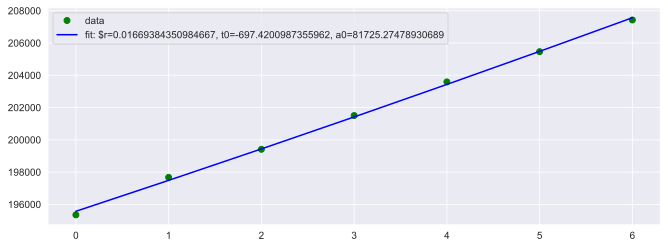

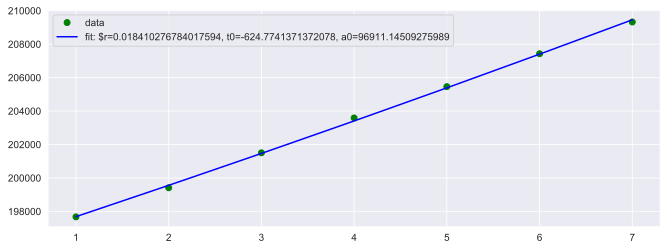

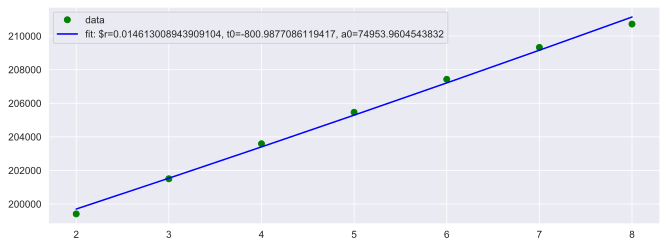

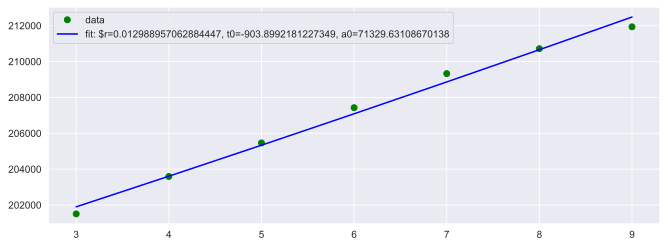

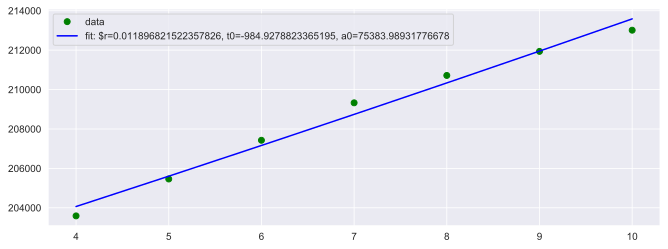

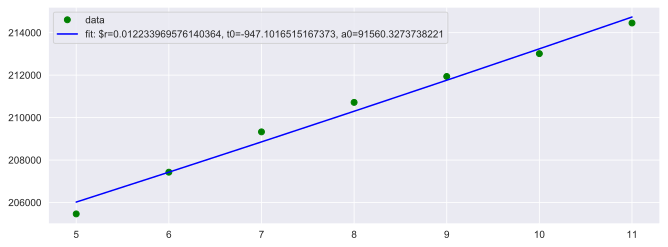

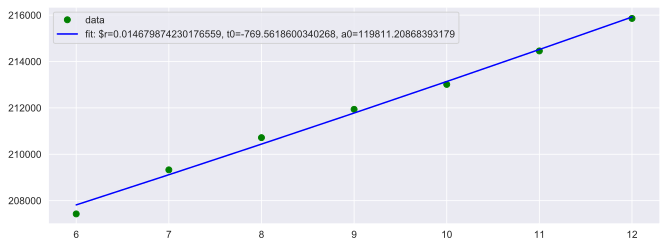

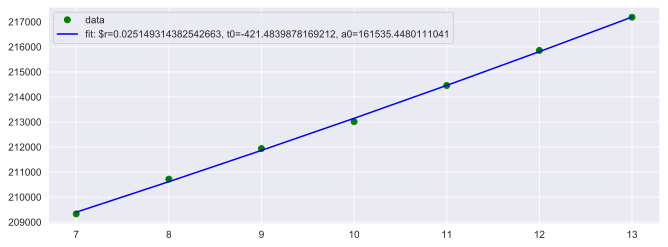

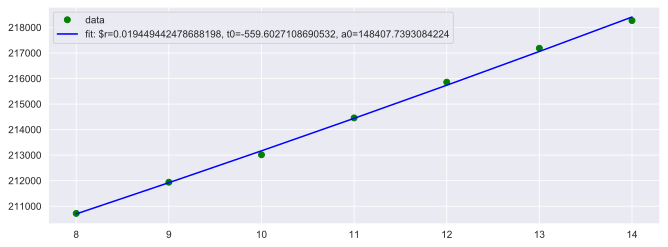

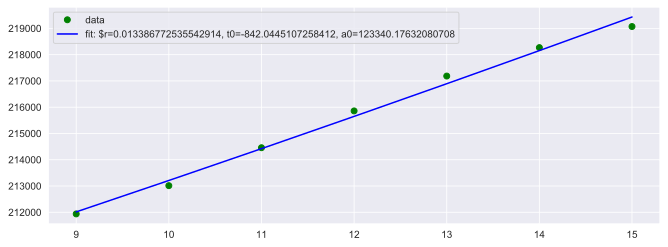

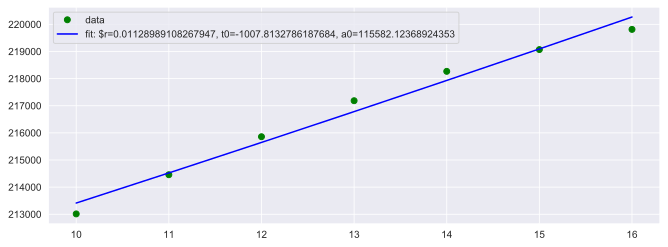

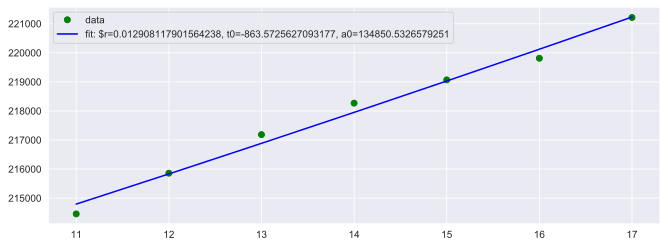

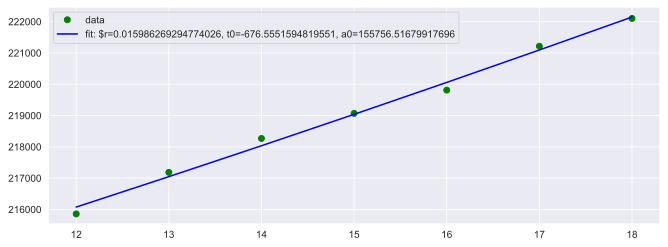

In [21]:
c = stack_country('Italy')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 435725.2151198612
r   : 0.0671
t0  : -189
a0  : 6.14e+05

r=0.0671179218990422, t0=-189.1714630942518, a0=613605.9596814183
Working on 1 to 8, this is 1/20
reduced chi^2: 306239.9919761902
r   : 0.0713
t0  : -177
a0  : 6.49e+05

r=0.07134739383890823, t0=-176.5095291726392, a0=648606.4602136825
Working on 2 to 9, this is 2/20
reduced chi^2: 904566.7488897089
r   : 0.024
t0  : -577
a0  : -1.36e+05

r=0.02404891854031568, t0=-577.2804585809815, a0=-135857.94353648066
Working on 3 to 10, this is 3/20
reduced chi^2: 2514414.146871207
r   : 0.0161
t0  : -885
a0  : -6.75e+05

r=0.016148786617059915, t0=-884.9872592863575, a0=-674768.635575539
Working on 4 to 11, this is 4/20
reduced chi^2: 3939092.9325537486
r   : 0.0149
t0  : -958
a0  : -7.1e+05

r=0.014944210173990988, t0=-958.1246265855244, a0=-709856.022683797
Working on 5 to 12, this is 5/20
reduced chi^2: 3163912.9463346945
r   : 0.0155
t0  : -918
a0  : -5.27e+05



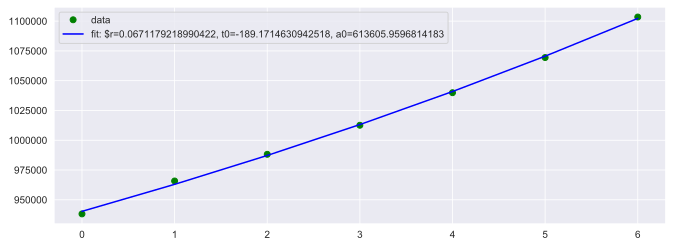

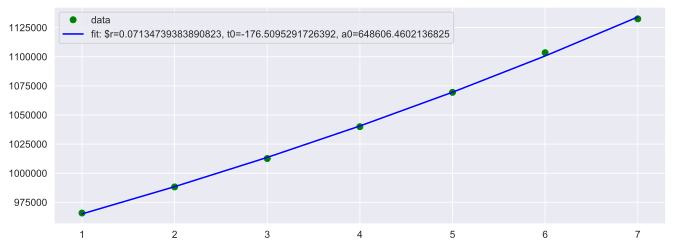

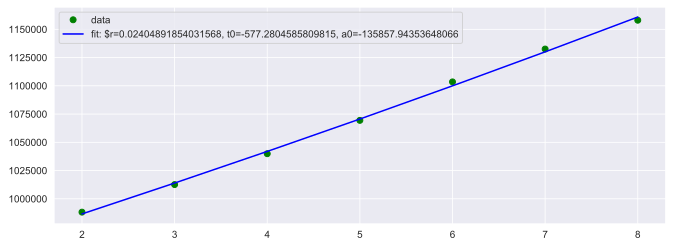

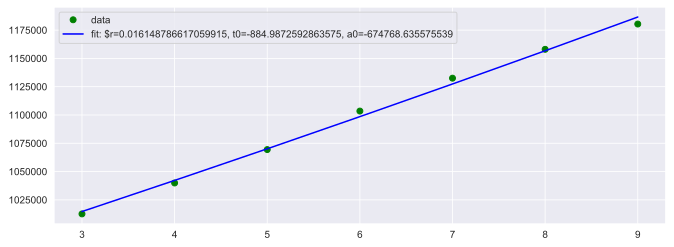

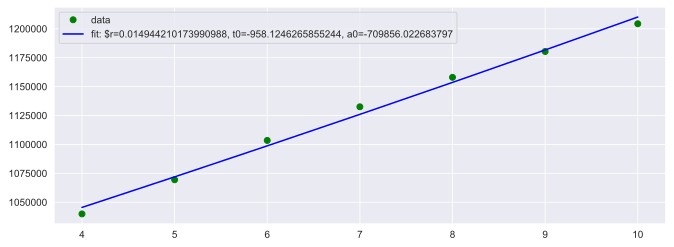

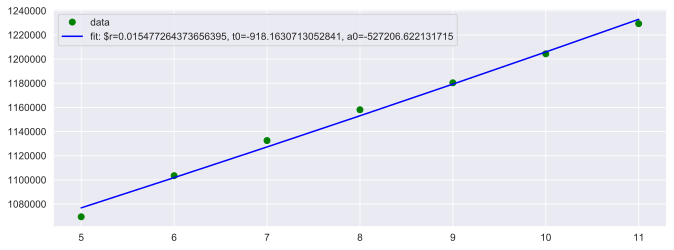

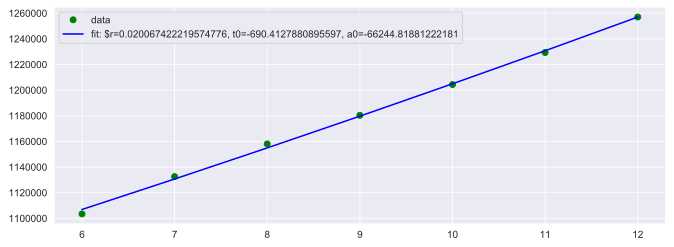

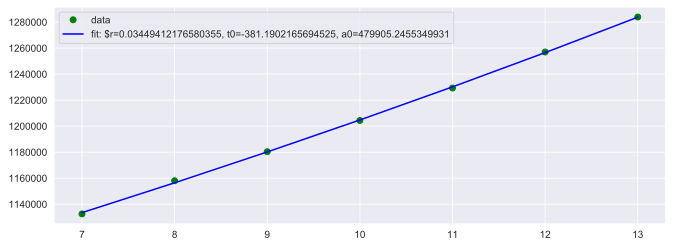

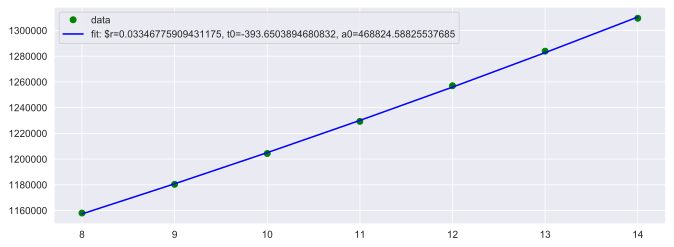

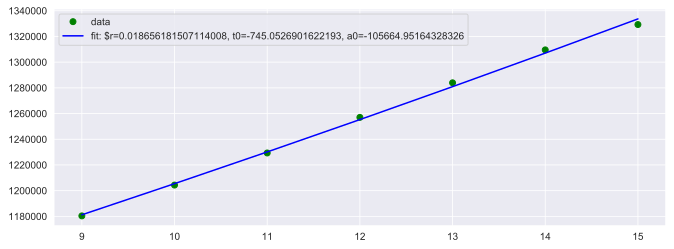

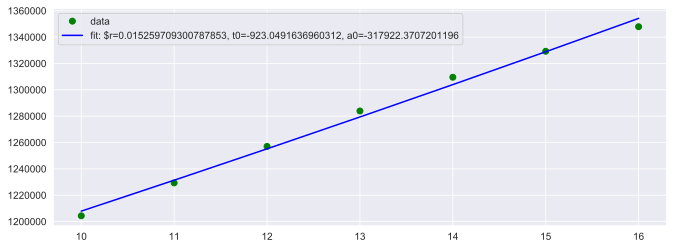

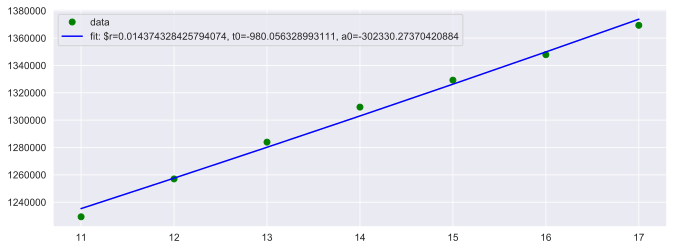

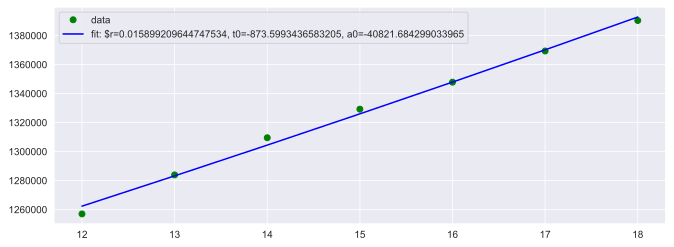

In [22]:
c = stack_country('US')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 19821.000466641475
r   : 0.0134
t0  : -864
a0  : 9.65e+04

r=0.013428899709192794, t0=-864.2164121985944, a0=96513.04312420443
Working on 1 to 8, this is 1/20
reduced chi^2: 16606.5591216041
r   : 0.0143
t0  : -801
a0  : 1.1e+05

r=0.014321952990106484, t0=-801.3988922174211, a0=110026.7102276938
Working on 2 to 9, this is 2/20
reduced chi^2: 17271.671035115232
r   : 0.0139
t0  : -824
a0  : 1.16e+05

r=0.013863766811625692, t0=-823.6875532159013, a0=116043.92906798984
Working on 3 to 10, this is 3/20
reduced chi^2: 30436.051902158273
r   : 0.0116
t0  : -989
a0  : 1.11e+05

r=0.01161133068271915, t0=-989.1558829434227, a0=110578.26783221329
Working on 4 to 11, this is 4/20
reduced chi^2: 17671.11148947766
r   : 0.013
t0  : -868
a0  : 1.32e+05

r=0.012959691652666019, t0=-868.2272208112871, a0=131762.8733144792
Working on 5 to 12, this is 5/20
reduced chi^2: 18583.519709047698
r   : 0.0121
t0  : -937
a0  : 1.28e+05



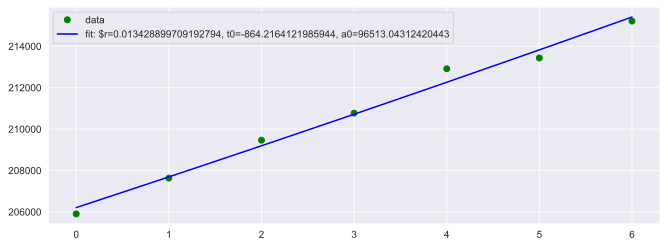

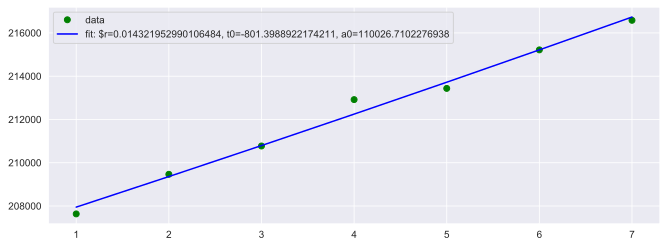

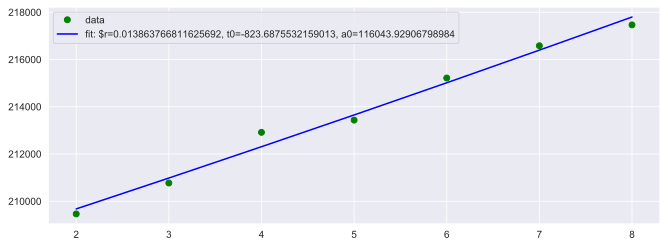

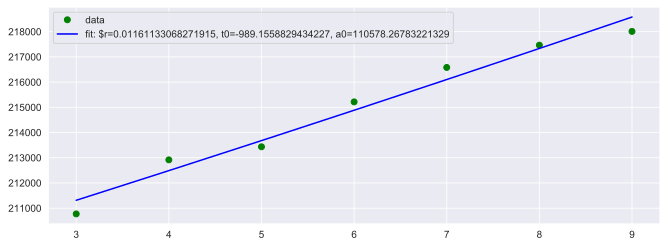

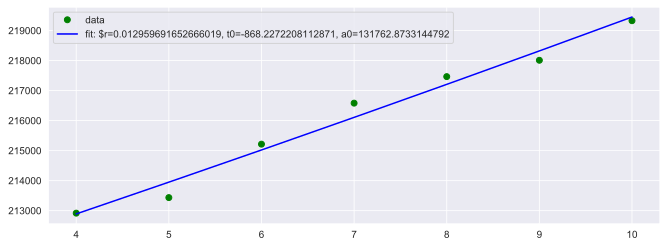

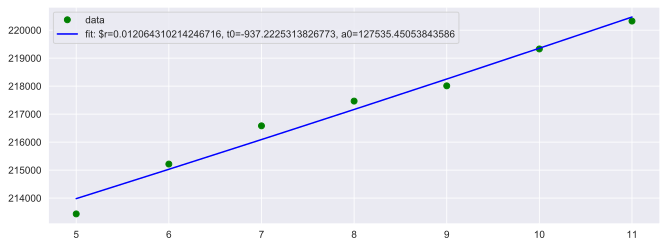

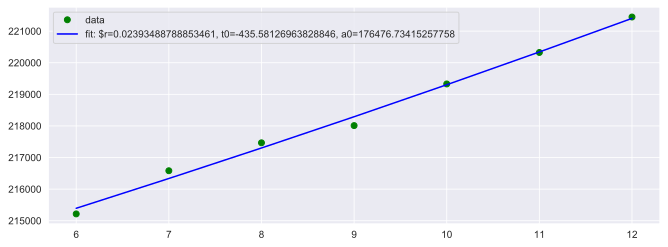

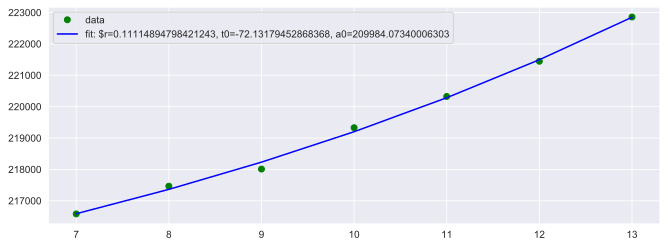

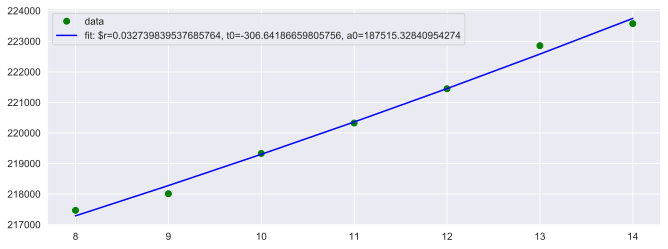

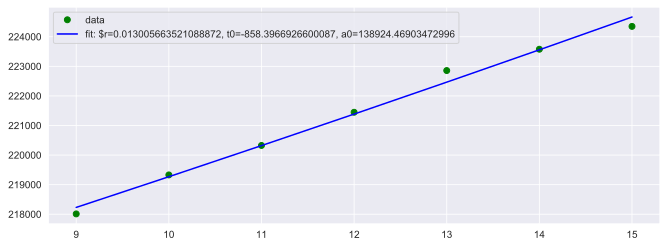

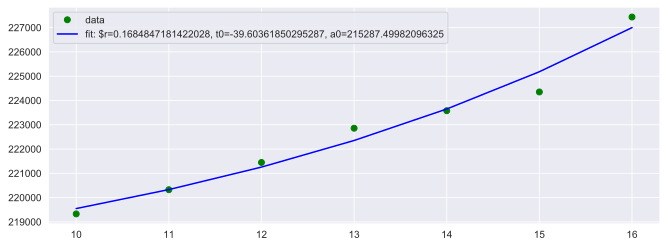

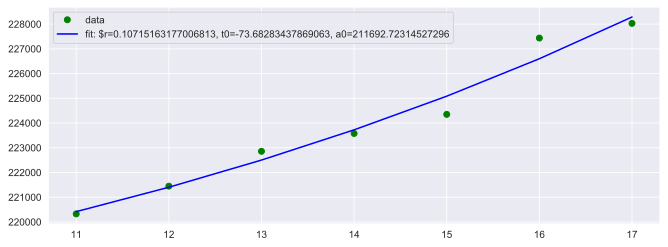

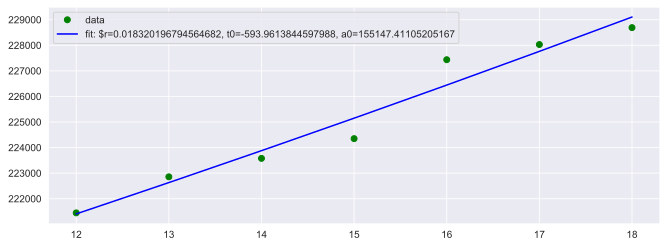

In [23]:
c = stack_country('Spain')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 7.634475339483127e-06
r   : 0.0017
t0  : 6.1
a0  : 6.81e+04

r=0.001704643119595145, t0=6.104828999237194, a0=68127.010940722
Working on 1 to 8, this is 1/20
reduced chi^2: 1.3021313793502784e-06
r   : 0.00136
t0  : 7.05
a0  : 6.81e+04

r=0.0013595862089715478, t0=7.046518859991713, a0=68127.00380141514
Working on 2 to 9, this is 2/20
reduced chi^2: 2.6787239321821725e-08
r   : -0.000187
t0  : 8.1
a0  : 6.81e+04

r=-0.00018691409599201798, t0=8.0975124184709, a0=68126.99930607452
Working on 3 to 10, this is 3/20
reduced chi^2: 1.0948666578159906e-06
r   : 0.00123
t0  : 9.13
a0  : 6.81e+04

r=0.001233128399309379, t0=9.130946390857217, a0=68127.00338058178
Working on 4 to 11, this is 4/20
reduced chi^2: 1.8789491539462192e-07
r   : 0.000253
t0  : 10.4
a0  : 6.81e+04

r=0.00025333663189065054, t0=10.36101475520876, a0=68126.99994687343
Working on 5 to 12, this is 5/20


RuntimeError: exception was raised in user function
User function arguments:
     r = +223.118223
    t0 = +7.405608
    a0 = +68458.849106
Original python exception in user function:
OverflowError: (34, 'Result too large')
  File "<ipython-input-16-6349838f1c32>", line 19, in least_squares
    return sum((ydata - model(xdata, r, t0, a0))**2)/yvar


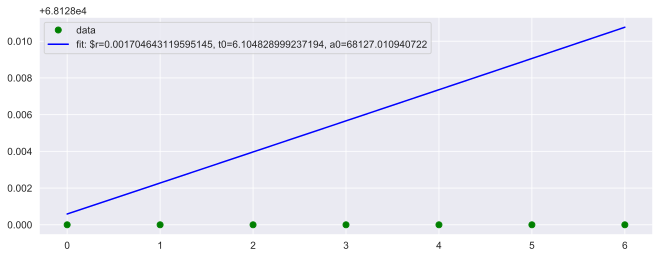

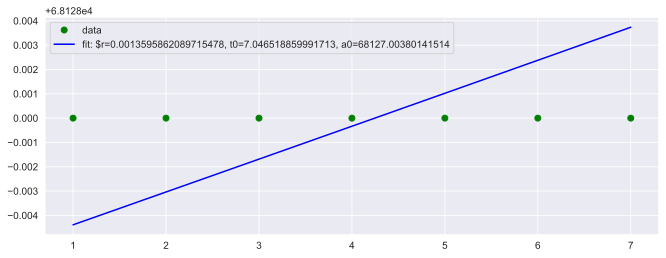

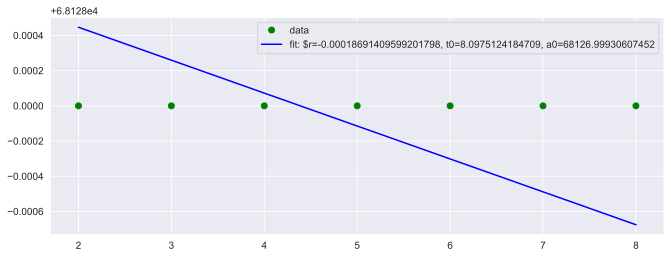

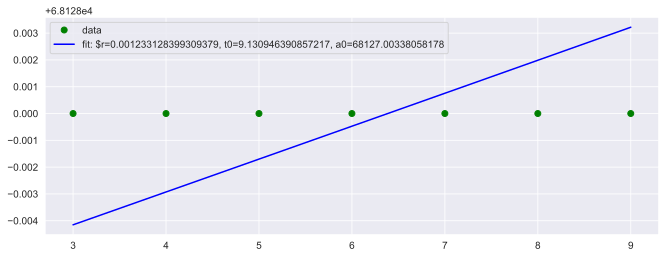

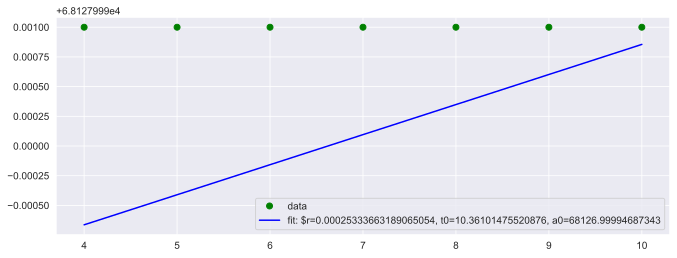

In [24]:
c = stack_country('China')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

In [25]:
p_confirmed.tail(n=10)

r       t0      a0 chi2
2020-05-05  0.0116113 -989.156  110578  NaN
2020-05-06  0.0129597 -868.227  131763  NaN
2020-05-07  0.0120643 -937.223  127535  NaN
2020-05-08  0.0239349 -435.581  176477  NaN
2020-05-09   0.111149 -72.1318  209984  NaN
2020-05-10  0.0327398 -306.642  187515  NaN
2020-05-11  0.0130057 -858.397  138924  NaN
2020-05-12   0.168485 -39.6036  215287  NaN
2020-05-13   0.107152 -73.6828  211693  NaN
2020-05-14  0.0183202 -593.961  155147  NaN

In [26]:
p_confirmed['double_time'] = double_time(p_confirmed['r'])

In [27]:
p_confirmed.tail(n=10)

r       t0      a0 chi2 double_time
2020-05-05  0.0116113 -989.156  110578  NaN     59.6958
2020-05-06  0.0129597 -868.227  131763  NaN     53.4849
2020-05-07  0.0120643 -937.223  127535  NaN     57.4544
2020-05-08  0.0239349 -435.581  176477  NaN     28.9597
2020-05-09   0.111149 -72.1318  209984  NaN      6.2362
2020-05-10  0.0327398 -306.642  187515  NaN     21.1714
2020-05-11  0.0130057 -858.397  138924  NaN     53.2958
2020-05-12   0.168485 -39.6036  215287  NaN     4.11401
2020-05-13   0.107152 -73.6828  211693  NaN     6.46884
2020-05-14  0.0183202 -593.961  155147  NaN     37.8351

Log basics ...

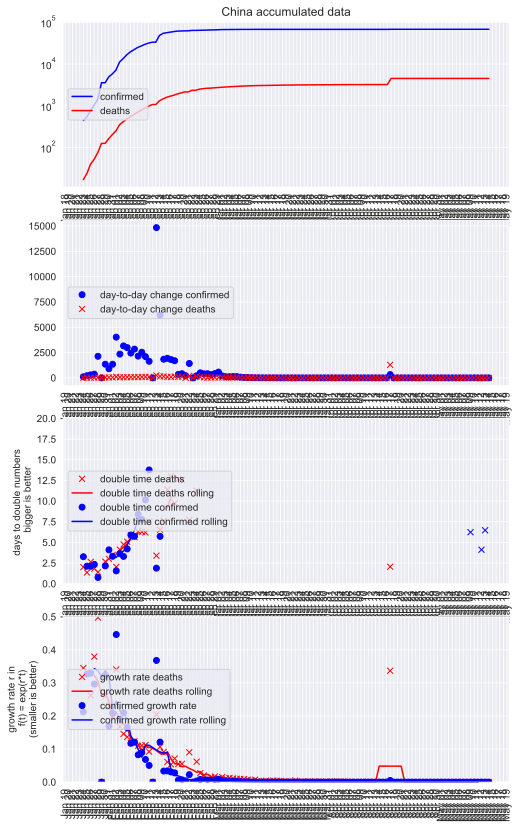

In [28]:
ax0, ax1, ax2, ax3 = overview_plot(c)
ax2.plot(p_confirmed.index, p_confirmed['double_time'], 'xb', label='double time confirmed fit')


In [29]:
from math import log 
log(2)/log(0.5)

-1.0

From https://en.wikipedia.org/wiki/Doubling_time
    
$$\Delta t = (t_2 - t_1) * \left(\frac{\log(2)}{\log
    \left(\frac{f(t_2)}{f(t_1)}\right)}\right)$$

In [30]:
from math import log
def double_time_exponential2(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate2(double_time):
    return log(2)/double_time


t1, t2, q1, q2 = 0, 1, 1, 2
double_time_exponential2(t1, t2, q1, q2), growth_rate2(double_time_exponential2(t1, t2, q1, q2) )

(1.0, 0.6931471805599453)

In [31]:
2**(1/double_time_exponential2(0, 1, 1, 21))

21.000000000000007

In [32]:
2/math.exp(1)

0.7357588823428847

In [33]:
math.exp(0.5)/2

0.8243606353500641

In [34]:
math.exp(0.6931471805599453*4)

15.999999999999998

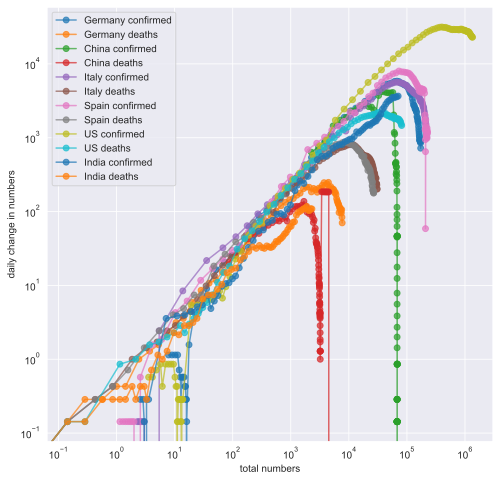

In [35]:
def logplots(c, columns, ax=None, alpha=0.7):
    """Dataframe c with colunmname 'column' contains the data we are interested in.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        ax = ax
        ax.set_xscale('log')
        ax.set_yscale('log')
    else:
        pass
    
    for col in columns:
        assert col in c.columns
        c2 = c.copy()
        c2['change'] = c2[col].diff()
    
        ax.plot(c2[col], c2['change'], '-o', label=c.country + " " + col, alpha=alpha) 
    
    ax.legend()
    ax.set_xlabel("total numbers")
    ax.set_ylabel("daily change in numbers")
    return ax

    
    
c = stack_country("Germany")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'])

c = stack_country("China")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("Italy")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("Spain")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("US")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("India")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()

c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)


In [36]:
c

confirmed deaths  days-td   days new_confirmed new_deaths  \
2020-01-31         1      0   0 days    0.0           NaN        NaN   
2020-02-01         1      0   1 days    1.0             0          0   
2020-02-02         2      0   2 days    2.0             1          0   
2020-02-03         3      0   3 days    3.0             1          0   
2020-02-04         3      0   4 days    4.0             0          0   
...              ...    ...      ...    ...           ...        ...   
2020-05-10     67161   2212 100 days  100.0          4353        111   
2020-05-11     70768   2294 101 days  101.0          3607         82   
2020-05-12     74292   2415 102 days  102.0          3524        121   
2020-05-13     78055   2551 103 days  103.0          3763        136   
2020-05-14     81997   2649 104 days  104.0          3942         98   

            confirmed_pct  deaths_pct  deaths_double_time  \
2020-01-31            NaN         NaN                 NaN   
2020-02-01       1.000000         NaN                 NaN   
2020-02-02       2.000000         NaN                 NaN   
2020-02-03       1.500000         NaN                 NaN   
2020-02-04       1.000000         NaN                 NaN   
...                   ...         ...                 ...   
2020-05-10       1.069306    1.052832           13.463440   
2020-05-11       1.053707    1.037071           19.042539   
2020-05-12       1.049797    1.052746           13.484759   
2020-05-13       1.050651    1.056315           12.651868   
2020-05-14       1.050503    1.038416           18.387442   

            confirmed_double_time  deaths_growth_rate  confirmed_growth_rate  
2020-01-31                    NaN                 NaN                    NaN  
2020-02-01                    inf                 NaN               0.000000  
2020-02-02               1.000000                 NaN               0.693147  
2020-02-03               1.709511                 NaN               0.405465  
2020-02-04                    inf                 NaN               0.000000  
...                           ...                 ...                    ...  
2020-05-10              10.343895            0.051484               0.067010  
2020-05-11              13.249695            0.036400               0.052314  
2020-05-12              14.263358            0.051402               0.048596  
2020-05-13              14.028357            0.054786               0.049410  
2020-05-14              14.068640            0.037697               0.049269  

[105 rows x 12 columns]

In [37]:
confirmed.loc['Germany']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-05-10 00:00:00    171879
2020-05-11 00:00:00    172576
2020-05-12 00:00:00    173171
2020-05-13 00:00:00    174098
2020-05-14 00:00:00    174478
Name: Germany, Length: 115, dtype: object

In [38]:
deaths.loc['Germany']

Province/State          NaN
2020-01-22 00:00:00       0
2020-01-23 00:00:00       0
2020-01-24 00:00:00       0
2020-01-25 00:00:00       0
                       ... 
2020-05-10 00:00:00    7569
2020-05-11 00:00:00    7661
2020-05-12 00:00:00    7738
2020-05-13 00:00:00    7861
2020-05-14 00:00:00    7884
Name: Germany, Length: 115, dtype: object

In [39]:
confirmed.loc['US']

Province/State             NaN
2020-01-22 00:00:00          1
2020-01-23 00:00:00          1
2020-01-24 00:00:00          2
2020-01-25 00:00:00          2
                        ...   
2020-05-10 00:00:00    1329260
2020-05-11 00:00:00    1347881
2020-05-12 00:00:00    1369376
2020-05-13 00:00:00    1390406
2020-05-14 00:00:00    1417774
Name: US, Length: 115, dtype: object

In [40]:
deaths.loc['US']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-05-10 00:00:00    79526
2020-05-11 00:00:00    80682
2020-05-12 00:00:00    82356
2020-05-13 00:00:00    84119
2020-05-14 00:00:00    85898
Name: US, Length: 115, dtype: object

In [41]:
confirmed.loc['China']

Province/State  2020-01-22 00:00:00  2020-01-23 00:00:00  \
Country/Region                                                             
China                    Anhui                    1                    9   
China                  Beijing                   14                   22   
China                Chongqing                    6                    9   
China                   Fujian                    1                    5   
China                    Gansu                    0                    2   
China                Guangdong                   26                   32   
China                  Guangxi                    2                    5   
China                  Guizhou                    1                    3   
China                   Hainan                    4                    5   
China                    Hebei                    1                    1   
China             Heilongjiang                    0                    2   
China                    Henan                    5                    5   
China                Hong Kong                    0                    2   
China                    Hubei                  444                  444   
China                    Hunan                    4                    9   
China           Inner Mongolia                    0                    0   
China                  Jiangsu                    1                    5   
China                  Jiangxi                    2                    7   
China                    Jilin                    0                    1   
China                 Liaoning                    2                    3   
China                    Macau                    1                    2   
China                  Ningxia                    1                    1   
China                  Qinghai                    0                    0   
China                  Shaanxi                    0                    3   
China                 Shandong                    2                    6   
China                 Shanghai                    9                   16   
China                   Shanxi                    1                    1   
China                  Sichuan                    5                    8   
China                  Tianjin                    4                    4   
China                    Tibet                    0                    0   
China                 Xinjiang                    0                    2   
China                   Yunnan                    1                    2   
China                 Zhejiang                   10                   27   

                2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
Country/Region                                                                  
China                            15                   39                   60   
China                            36                   41                   68   
China                            27                   57                   75   
China                            10                   18                   35   
China                             2                    4                    7   
China                            53                   78                  111   
China                            23                   23                   36   
China                             3                    4                    5   
China                             8                   19                   22   
China                             2                    8                   13   
China                             4                    9                   15   
China                             9                   32                   83   
China                             2                    5                    8   
China                           549                  761                 1058   
China                            24                   43   

In [42]:
deaths.loc['China']

Province/State  2020-01-22 00:00:00  2020-01-23 00:00:00  \
Country/Region                                                             
China                    Anhui                    0                    0   
China                  Beijing                    0                    0   
China                Chongqing                    0                    0   
China                   Fujian                    0                    0   
China                    Gansu                    0                    0   
China                Guangdong                    0                    0   
China                  Guangxi                    0                    0   
China                  Guizhou                    0                    0   
China                   Hainan                    0                    0   
China                    Hebei                    0                    1   
China             Heilongjiang                    0                    0   
China                    Henan                    0                    0   
China                Hong Kong                    0                    0   
China                    Hubei                   17                   17   
China                    Hunan                    0                    0   
China           Inner Mongolia                    0                    0   
China                  Jiangsu                    0                    0   
China                  Jiangxi                    0                    0   
China                    Jilin                    0                    0   
China                 Liaoning                    0                    0   
China                    Macau                    0                    0   
China                  Ningxia                    0                    0   
China                  Qinghai                    0                    0   
China                  Shaanxi                    0                    0   
China                 Shandong                    0                    0   
China                 Shanghai                    0                    0   
China                   Shanxi                    0                    0   
China                  Sichuan                    0                    0   
China                  Tianjin                    0                    0   
China                    Tibet                    0                    0   
China                 Xinjiang                    0                    0   
China                   Yunnan                    0                    0   
China                 Zhejiang                    0                    0   

                2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
Country/Region                                                                  
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             1                    1                    1   
China                             1                    1                    1   
China                             0                    0                    1   
China                             0                    0                    0   
China                            24                   40                   52   
China                             0                    0   

In [43]:
confirmed.loc['Italy']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-05-10 00:00:00    219070
2020-05-11 00:00:00    219814
2020-05-12 00:00:00    221216
2020-05-13 00:00:00    222104
2020-05-14 00:00:00    223096
Name: Italy, Length: 115, dtype: object

In [44]:
deaths.loc['Italy']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-05-10 00:00:00    30560
2020-05-11 00:00:00    30739
2020-05-12 00:00:00    30911
2020-05-13 00:00:00    31106
2020-05-14 00:00:00    31368
Name: Italy, Length: 115, dtype: object

In [45]:
confirmed.loc['Spain']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-05-10 00:00:00    224350
2020-05-11 00:00:00    227436
2020-05-12 00:00:00    228030
2020-05-13 00:00:00    228691
2020-05-14 00:00:00    229540
Name: Spain, Length: 115, dtype: object

In [46]:
deaths.loc['Spain']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-05-10 00:00:00    26621
2020-05-11 00:00:00    26744
2020-05-12 00:00:00    26920
2020-05-13 00:00:00    27104
2020-05-14 00:00:00    27321
Name: Spain, Length: 115, dtype: object

In [47]:
confirmed.loc['India']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-05-10 00:00:00    67161
2020-05-11 00:00:00    70768
2020-05-12 00:00:00    74292
2020-05-13 00:00:00    78055
2020-05-14 00:00:00    81997
Name: India, Length: 115, dtype: object

In [48]:
deaths.loc['India']

Province/State          NaN
2020-01-22 00:00:00       0
2020-01-23 00:00:00       0
2020-01-24 00:00:00       0
2020-01-25 00:00:00       0
                       ... 
2020-05-10 00:00:00    2212
2020-05-11 00:00:00    2294
2020-05-12 00:00:00    2415
2020-05-13 00:00:00    2551
2020-05-14 00:00:00    2649
Name: India, Length: 115, dtype: object